In [231]:
import numpy as np

In [232]:
# OR, AND, NOR, NAND
X = np.array(([0,0],
              [0,1],
              [1,0],
              [1,1]))

Y_OR = np.array([0,1,1,1])
Y_AND = np.array([0,0,0,1])
Y_NOR = np.array([1,0,0,0])
Y_NAND = np.array([1,1,1,0])

In [233]:
X = np.c_[np.ones(len(X)),X]

In [234]:
optimizedTheta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y_NAND)

In [235]:
theta = np.random.rand(3)

In [333]:
linearFn = lambda X,W:X.dot(W)
#                (D,3)   (3,)
linearDerivFn = lambda X,Y,W:2*X.T.dot(Y-X.dot(W))
#                             (3,4)   (4,)  (4,)

In [334]:
lossFn = lambda X,Y,W:np.linalg.norm(Y-linearFn(X,W))


In [244]:
theta = np.random.rand(3)

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = linearDerivFn(X,Y_NAND,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%100 == 0:
        history.append(lossFn(X,Y_NAND,theta))

In [245]:
optimizedTheta, theta, len(history)

(array([ 1.25, -0.5 , -0.5 ]),
 array([ 1.25000631, -0.49999626, -0.49999626]),
 2000)

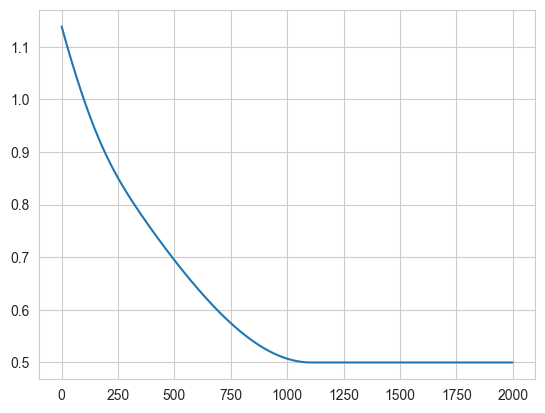

In [246]:
plt.plot(history)

In [174]:
import matplotlib.pyplot as plt

array([ 1.08385174, -0.36032375, -0.3595269 ])

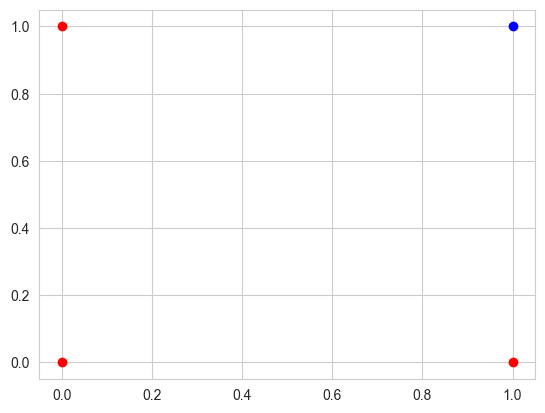

In [175]:
for b,x1,x2 in X:
    plt.scatter(x1,x2,c='r' if linearFn(np.array([b,x1,x2]), theta) > .5 else 'b')
theta

In [176]:
X[0]

array([1., 0., 0.])

In [338]:
logisticFn = lambda X,W:1/(1+np.exp(-X.dot(W)))
logisticDerivFn = lambda X,Y,W:X.T.dot(Y-logisticFn(X,W))

In [339]:
logisticLossFn = lambda X,Y,W:Y[Y==1].dot(np.log(logisticFn(X[Y==1],W))) + (1-Y[Y==0]).dot(np.log(1-logisticFn(X[Y==0],W)))

In [187]:
theta = np.random.rand(3)

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = logisticDerivFn(X,Y_OR,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%1000 == 0:
        history.append(-logisticLossFn(X,Y_OR,theta))

array([-0.15720275,  1.91233292,  1.81178299])

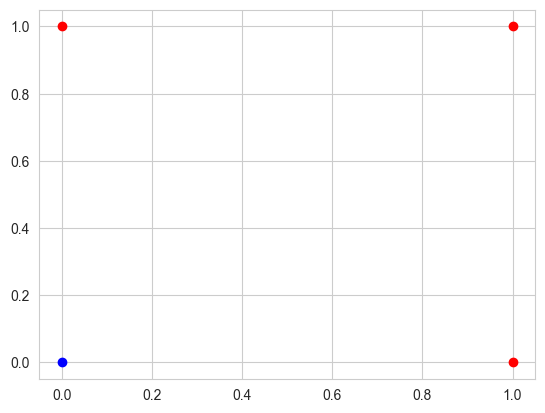

In [188]:
for b,x1,x2 in X:
    plt.scatter(x1,x2,c='r' if linearFn(np.array([b,x1,x2]), theta) > .5 else 'b')
theta

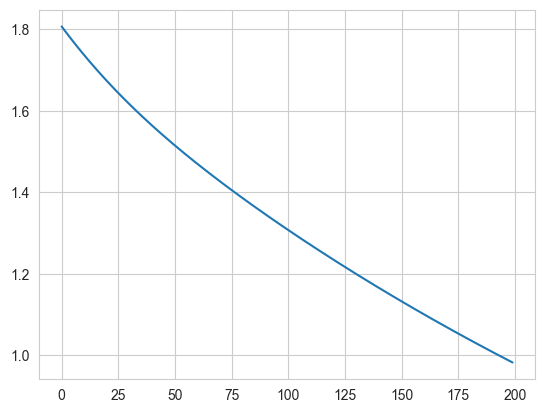

In [189]:
plt.plot(history)

In [50]:
from sklearn import datasets

In [190]:
data = datasets.load_breast_cancer()

In [261]:
X = data.data[:,0]
Y = data.target

In [262]:
X = np.c_[np.ones(len(X)), X]

In [263]:
X.shape, Y.shape

((569, 2), (569,))

In [264]:
linearFn = lambda X,W:X.dot(W)
#                (D,3)   (3,)
linearDerivFn = lambda X,Y,W:2*X.T.dot(Y-X.dot(W))
#                             (3,4)   (4,)  (4,)

In [265]:
lossFn = lambda X,Y,W:np.linalg.norm(Y-linearFn(x,w))

In [266]:
theta = np.random.rand(2)

h = 1e-5
i = 200000

history = list()


for _ in range(i):
    v = linearDerivFn(X,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%10000 == 0:
        history.append(lossFn(X,Y_OR,theta))

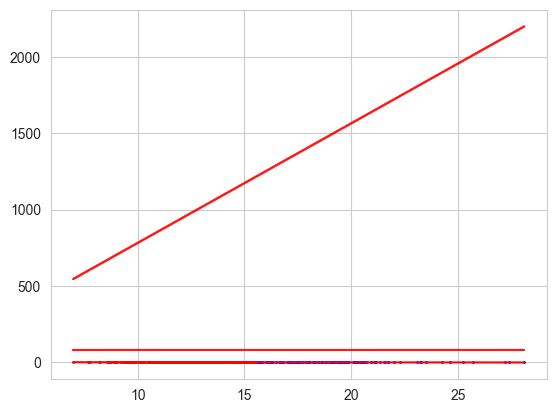

In [267]:
x1 = np.array([1, X[:,[1]].min()])
x2 = np.array([1, X[:,[1]].max()])

for x,y in zip(X, Y):
    plt.scatter(x[1],y,c='red' if linearFn(x,theta)>.5 else 'blue',s=1)

for w in history:
    plt.plot([x1[1], x2[1]], [linearFn(x1,w),linearFn(x2,w)],'r-',alpha=.1)
plt.plot([x1[1], x2[1]], [linearFn(x1,theta),linearFn(x2,theta)],'r-')

In [201]:
theta = np.random.rand(2)

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = logisticDerivFn(X,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%1000 == 0:
        history.append(-logisticLossFn(X,Y,theta))

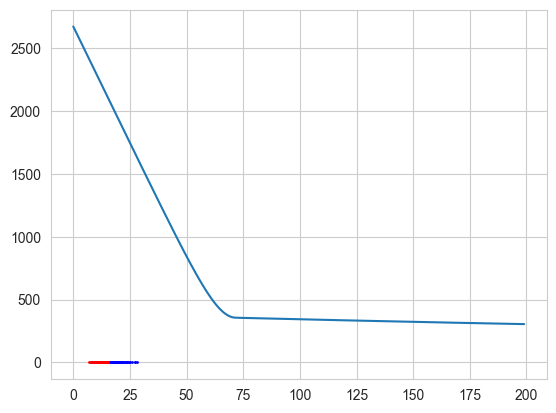

In [203]:
x1 = np.array([1, X[:,[1]].min()])
x2 = np.array([1, X[:,[1]].max()])

for x,y in zip(X, Y):
    plt.scatter(x[1],y,c='red' if logisticFn(x,theta)>.5 else 'blue',s=1)
plt.plot(history)

X 전체에 대해 fitting

In [69]:
import sklearn

In [247]:
data = datasets.load_breast_cancer()

In [268]:
X = data.data[:,:3]
Y = data.target

In [269]:
X

array([[ 17.99,  10.38, 122.8 ],
       [ 20.57,  17.77, 132.9 ],
       [ 19.69,  21.25, 130.  ],
       ...,
       [ 16.6 ,  28.08, 108.3 ],
       [ 20.6 ,  29.33, 140.1 ],
       [  7.76,  24.54,  47.92]])

In [270]:
X = np.c_[np.ones(len(X)), X]

In [271]:
X.shape, Y.shape

((569, 4), (569,))

In [272]:
linearFn = lambda X,W:X.dot(W)
#                (D,32)   (3,)
linearDerivFn = lambda X,Y,W:2*X.T.dot(Y-X.dot(W))
#                             (3,4)   (4,)  (4,)

In [275]:
theta = np.random.rand(X.shape[1])

In [276]:
theta

array([0.52745429, 0.68725348, 0.59346575, 0.4181554 ])

In [277]:
h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = linearDerivFn(X,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%10000 == 0:
        history.append(theta)

ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

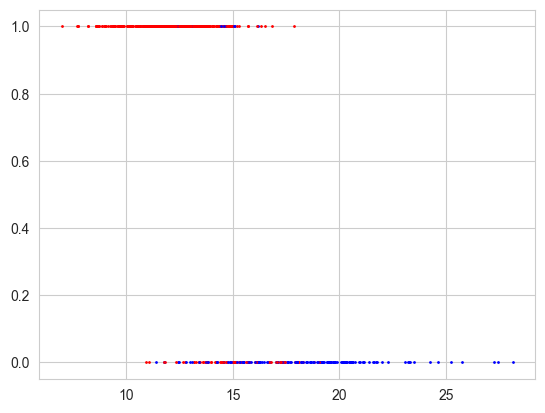

In [278]:
x1 = np.array([1, X[:,[1]].min()])
x2 = np.array([1, X[:,[1]].max()])

for x,y in zip(X, Y):
    plt.scatter(x[1],y,c='red' if linearFn(x,theta)>.5 else 'blue',s=1)

for w in history:
    plt.plot([x1[1], x2[1]], [linearFn(x1,w),linearFn(x2,w)],'r-',alpha=.1)
plt.plot([x1[1], x2[1]], [linearFn(x1,theta),linearFn(x2,theta)],'r-')

In [65]:
theta = np.random.rand(2)

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = logisticDerivFn(X,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%10000 == 0:
        history.append(theta)

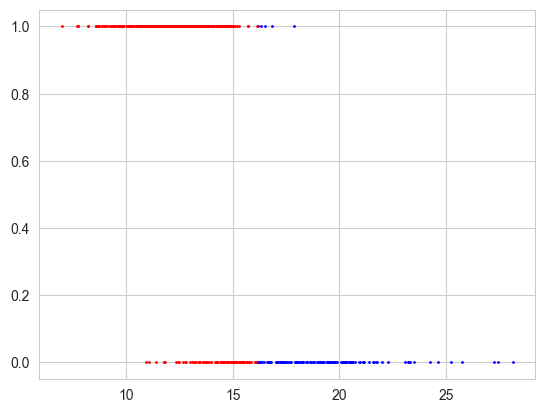

In [68]:
x1 = np.array([1, X[:,[1]].min()])
x2 = np.array([1, X[:,[1]].max()])

for x,y in zip(X, Y):
    plt.scatter(x[1],y,c='red' if logisticFn(x,theta)>.5 else 'blue',s=1)

=> 스팸 분류 적용

In [421]:
list(zip(theta,V))

[(0.31665023921507124, 'tokyo'),
 (-0.3282489718563888, 'shanhai'),
 (0.5084842267593991, 'japan'),
 (-0.0758337764722302, 'beijing'),
 (0.5084842267593993, 'macao'),
 (0.5959171772182499, 'chinese')]

In [399]:
D = [
    (1, "Chinese Beijing Chinese", True),
    (1, "Chinese Chinese Shanhai", True),
    (1, "Chinese Macao", True),
    (1, "Tokyo Japan Chinese", False)

]
T = [
    (5, "Chinese Chinese Chinese Tokyo Japan")
]

In [400]:
V = list(set('\n'.join([d[1].lower() for d in D]).split()))

In [401]:
X = np.zeros((len(D), len(V)))
Y = np.zeros(len(D))

In [402]:
for i, d in enumerate(D):
    for t in d[1].lower().split():
        j = V.index(t)
        X[i][j] += 1
    Y[i] = 1 if d[-1] else 0

In [403]:
X

array([[0., 0., 0., 1., 0., 2.],
       [0., 1., 0., 0., 0., 2.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1.]])

In [404]:
binX = X.copy()

In [405]:
binX[binX>0]=1

In [406]:
binX

array([[0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1.]])

In [412]:
X

array([[0., 0., 0., 1., 0., 2.],
       [0., 1., 0., 0., 0., 2.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1.]])

In [413]:
X = np.c_[np.ones(len(D)),X]
binX = np.c_[np.ones(len(D)),binX]

In [414]:
X, binX

(array([[1., 0., 0., 0., 1., 0., 2.],
        [1., 0., 1., 0., 0., 0., 2.],
        [1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 1., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 1., 0., 0., 1.]]))

In [415]:
theta = np.random.rand(binX.shape[-1])

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = linearDerivFn(X,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%1000 == 0:
        history.append(lossFn(X,Y,theta))

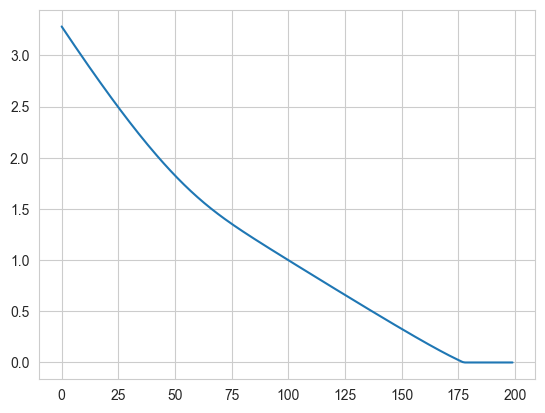

In [416]:
plt.plot(history)

In [417]:
x = np.zeros(X.shape[-1])

In [418]:
x[0] = 1

In [419]:
for t in T[0][1].lower().split():
    j = V.index(t)
    x[j+1] = 1

In [420]:
linearFn(x,theta) > .5

False

In [342]:
theta = np.random.rand(binX.shape[-1])

h = 1e-5
i = 200000

history = list()

for _ in range(i):
    v = logisticDerivFn(binX,Y,theta)
    u = v/np.linalg.norm(v)
    theta = theta + h*u

    if _%1000 == 0:
        history.append(-logisticLossFn(binX,Y,theta))

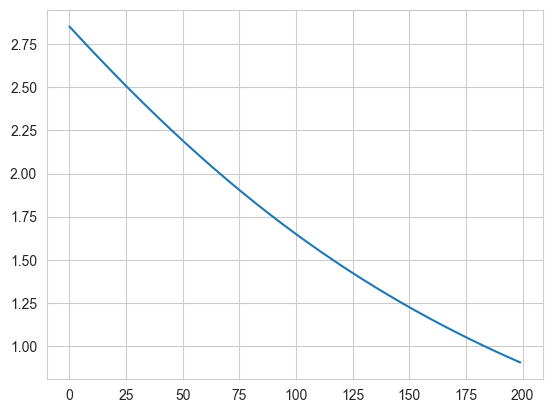

In [343]:
plt.plot(history)

In [395]:
#(X.T/X.sum(axis=1)).T
#TF:freq/maxfreq
#np.log(len(D)/X.sum(axis=0))
#IDF:log(N/n)
weightedX = (X.T/X.sum(axis=1)).T*np.log(len(D)/binX.sum(axis=0))

In [396]:
weightedX = np.c_[np.ones(len(D)), weightedX]

In [397]:
weightedX.shape, X.shape, binX.shape

((4, 8), (4, 7), (4, 7))